In [18]:
import numpy as np
from scipy.stats import gamma, cauchy


In [19]:
def gamma_sampling_from_cauchy(
    alpha=2.0, beta=1.0, x0=0.0, gamma_param=1.0, M=1.5, rng=None
):
    if rng is None:
        rng = np.random.default_rng()
    while True:
        x = cauchy.rvs(loc=x0, scale=gamma_param, random_state=rng)
        if x <= 0:
            continue
        p = gamma.pdf(x, a=alpha, scale=1.0 / beta)
        g = cauchy.pdf(x, loc=x0, scale=gamma_param)
        u = rng.uniform(0.0, 1.0)
        if u < p / (M * g):
            return x

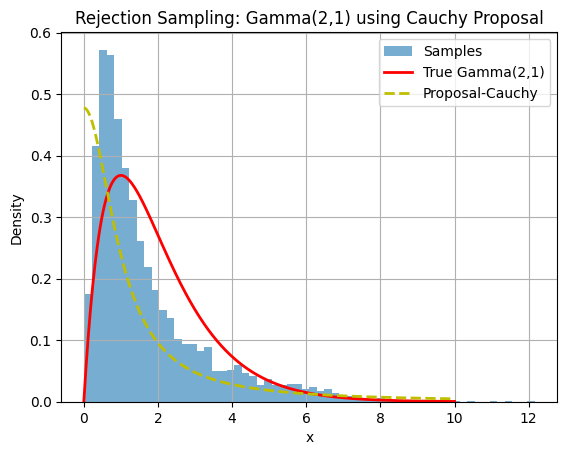

In [20]:
samples = [gamma_sampling_from_cauchy() for _ in range(10000)]
import matplotlib.pyplot as plt

M = 1.5
x = np.linspace(0, 10, 500)
plt.hist(samples, bins=60, density=True, alpha=0.6, label="Samples")
plt.plot(x, gamma.pdf(x, a=2, scale=1), "r-", lw=2, label="True Gamma(2,1)")
plt.plot(x, M*cauchy.pdf(x, loc=0.0, scale=1.0), "y--", lw=2, label="Proposal-Cauchy")
plt.legend()
plt.xlabel("x")
plt.ylabel("Density")
plt.title("Rejection Sampling: Gamma(2,1) using Cauchy Proposal")
plt.grid(True)
plt.show()